# Quiz 1

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:

df = pd.read_csv('dat.csv')
df.head()

,X1,X2,Y
0,0.931719,50.942832,2596.040230
1,0.796997,50.312938,2532.026902
2,1.115603,50.156194,2516.888332
3,1.064629,50.774814,2579.215190
4,1.796804,50.055668,2508.798424


### Distribución de los datos 

X1 vs Y

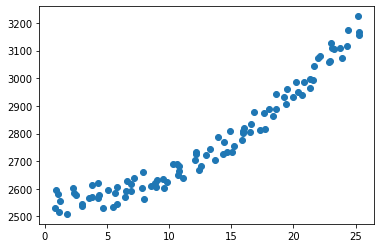

In [101]:
plt.scatter(df.iloc[:100,0], df.iloc[:100,2])

X2 vs Y

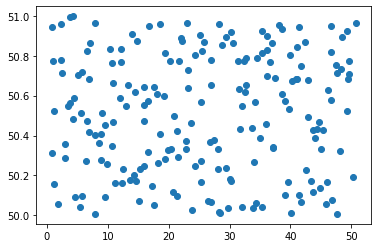

In [102]:
plt.scatter(df.iloc[:200,0], df.iloc[:200,1])

Debido a la distribución de los datos, se intentará con modelos de 1 y 2 polinomios, combinándose entre variables

### Descenso del gradiente

In [103]:
def linear_cost(X, y, theta):
    h = X @ theta
    return ((h - y) ** 2).sum() / (2*len(X))

def linear_cost_gradient(X, y, theta):
    h = X @ theta
    return ((h - y).T @ X).T / (2*len(X))

def gradient_descent(
    X, y, theta_0, 
    cost_function, cost_function_gradient,
    learning_rate, threshold,
    max_iter=1000
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(cost_function_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(X, y, theta)
        costs.append(cost_function(X, y, theta))
        thetas.append(theta.copy())

    return theta, costs, thetas

Variables a utilizar

In [104]:
df['ones'] = np.ones(len(df))
X = np.array(df.iloc[:,[0, 1, 3]].copy())
y = np.array(df.iloc[:,[2]].copy())

In [105]:
m, n = X.shape
theta_0 = np.random.rand(n,1)

Función para distribuir datos en entrenamiento, testeo y cross validation

In [106]:
def repartirData(X, y):
    X_train = X[:120000]
    X_cv = X[120001:140000]
    X_test = X[140001:160000]
    y_train = y[:120000]
    y_cv = y[120001:140000]
    y_test = y[140001:160000]

    return X_train, X_cv, X_test, y_train, y_cv, y_test

## Grado 1 X1, X2

In [107]:
np.random.shuffle(X)
np.random.shuffle(y)

In [108]:
X_train, X_cv, X_test, y_train, y_cv, y_test = repartirData(X, y)

In [109]:
learnr = 0.0000001
thr = 0.001

Train

In [110]:
r_theta_tr, costs_tr, thetas_tr = gradient_descent(X_train, y_train, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [111]:
r_theta_tr

array([[34.51938111],
       [83.23264505],
       [ 1.60311625]])

Text(0.5, 1.0, 'Gráfica de costos (train): X1 y X2')

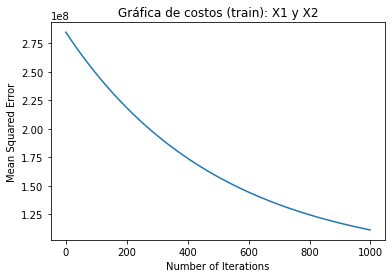

In [112]:
plt.plot(costs_tr)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (train): X1 y X2')

Test

In [113]:
r_theta_te, costs_te, thetas_te = gradient_descent(X_test, y_test, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [148]:
r_theta_te

array([[1.62297361],
       [0.63129221],
       [2.42772809]])

Text(0.5, 1.0, 'Gráfica de costos (test): X1 y X2')

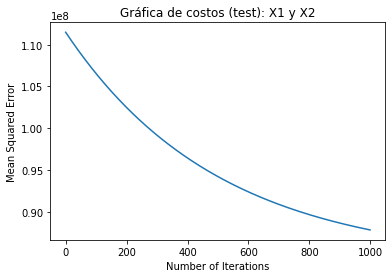

In [114]:
plt.plot(costs_te)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (test): X1 y X2')

CV

In [115]:
r_theta_cv, costs_cv, thetas_cv = gradient_descent(X_cv, y_cv, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [149]:
r_theta_cv

array([[1.62297361],
       [0.63129221],
       [2.42772809]])

Text(0.5, 1.0, 'Gráfica de costos (CV): X1 y X2')

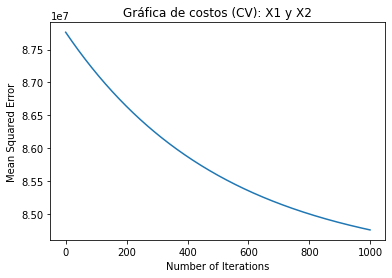

In [116]:
plt.plot(costs_cv)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (CV): X1 y X2')

En general los costos del modelo se mantienen fieles a lo largo de las pruebas pero es un error muy alto

Tendencia

Text(0.5, 1.0, 'Línea de tendencia ambos polinomios grado 1')

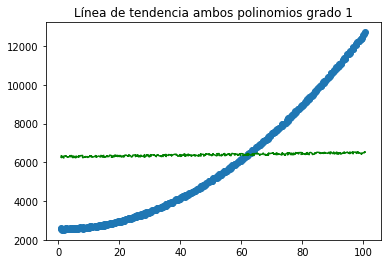

In [117]:
plt.scatter(df.iloc[:400,0], df.iloc[:400,2])
plt.plot(df.iloc[:400,0], np.array(df.iloc[:400,[3, 1, 0]]) @ r_theta_cv, color='green')
plt.title('Línea de tendencia ambos polinomios grado 1')

Debido a la forma observada de los datos se harán pruebas para polinomio grado 2

## Grado 2 X1, grado 1 X2

In [118]:
np.random.shuffle(X)
np.random.shuffle(y)

In [119]:
X12 = X.copy()
X12[:,0] = np.square(X12[:,0])
X_train2, X_cv2, X_test2, y_train2, y_cv2, y_test2 = repartirData(X12, y)

In [120]:
df["X12"] = X12[:,0]

In [121]:
learnr = 0.0000001
thr = 0.01

Train

In [122]:
r_theta_tr2, costs_tr2, thetas_tr2 = gradient_descent(X_train2, y_train2, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [123]:
r_theta_tr2

array([[  0.86355762],
       [125.68212523],
       [  2.19949482]])

Text(0.5, 1.0, 'Gráfica de costos (train): X1^2 y X2')

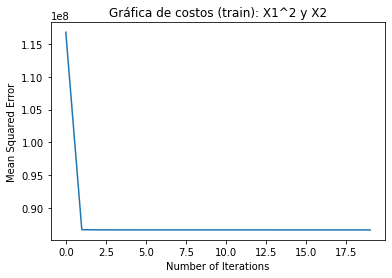

In [124]:
plt.plot(costs_tr2[:20])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (train): X1^2 y X2')

Test

In [125]:
r_theta_te2, costs_te2, thetas_te2 = gradient_descent(X_test2, y_test2, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [150]:
r_theta_te2

array([[1.62297361],
       [0.63129221],
       [2.42772809]])

Text(0.5, 1.0, 'Gráfica de costos (test): X1^2 y X2')

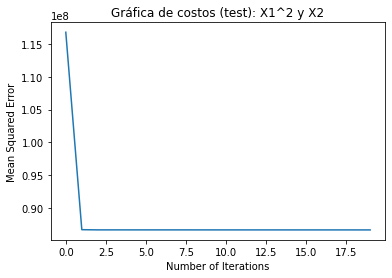

In [126]:
plt.plot(costs_tr2[:20])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (test): X1^2 y X2')

CV

In [127]:
r_theta_cv2, costs_cv2, thetas_cv2 = gradient_descent(X_cv2, y_cv2, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [152]:
r_theta_cv2

array([[1.62297361],
       [0.63129221],
       [2.42772809]])

Text(0.5, 1.0, 'Gráfica de costos (CV): X1^2 y X2')

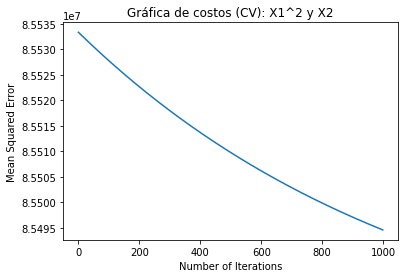

In [128]:
plt.plot(costs_cv2)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (CV): X1^2 y X2')

Los costos se muestran dramáticamente bajos en el train y test pero al probar con datos foráneos artificiales se muestra que no es generalizable por el error alto que arroja

Tendencia

Text(0.5, 1.0, 'Línea de tendencia polinomio X1 grado 2 y X2 grado 1')

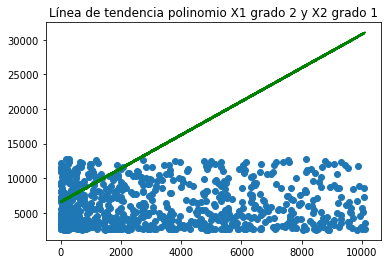

In [129]:
plt.scatter(df.iloc[:800, 4], df.iloc[:800,2])
plt.plot(df.iloc[:800, 4], np.array(df.iloc[:800,[3, 1, 4]]) @ r_theta_tr2, color='green')
plt.title('Línea de tendencia polinomio X1 grado 2 y X2 grado 1')

## Grado 1 X1, grado 2 X2

In [130]:
np.random.shuffle(X)
np.random.shuffle(y)

In [131]:
X22 = X.copy()
X22[:,1] = np.square(X22[:,1])
X_train3, X_cv3, X_test3, y_train3, y_cv3, y_test3 = repartirData(X22, y)

In [132]:
df["X22"] = X22[:,1]

In [133]:
learnr = 0.000000001
thr = 0.1

Train

In [134]:
r_theta_tr3, costs_tr3, thetas_tr3 = gradient_descent(X_train3, y_train3, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [135]:
r_theta_tr3

array([[0.64576277],
       [0.85511042],
       [2.41959308]])

Text(0.5, 1.0, 'Gráfica de costos (train): X1 y X2^2')

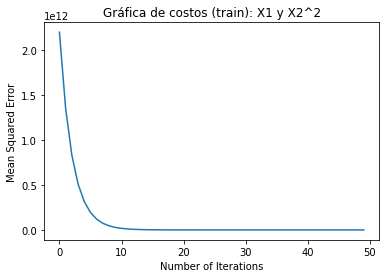

In [136]:
plt.plot(costs_tr3[:50])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (train): X1 y X2^2')

Test

In [137]:
r_theta_te3, costs_te3, thetas_te3 = gradient_descent(X_test3, y_test3, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [153]:
r_theta_te3

array([[1.62297361],
       [0.63129221],
       [2.42772809]])

Text(0.5, 1.0, 'Gráfica de costos (test): X1 y X2^2')

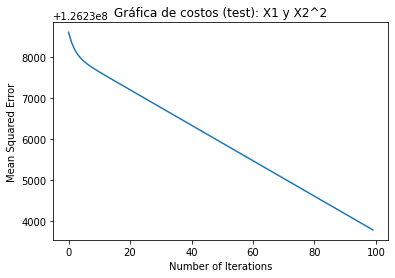

In [160]:
plt.plot(costs_te3[:100])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (test): X1 y X2^2')

CV

In [139]:
r_theta_cv3, costs_cv3, thetas_cv3 = gradient_descent(X_cv3, y_cv3, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [154]:
r_theta_cv3

array([[1.62297361],
       [0.63129221],
       [2.42772809]])

Text(0.5, 1.0, 'Gráfica de costos (CV): X1 y X2^2')

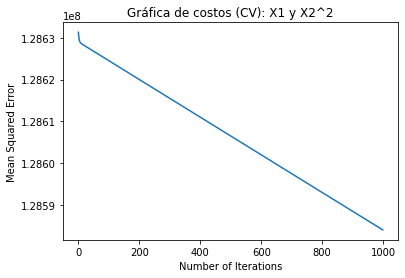

In [140]:
plt.plot(costs_cv3)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (CV): X1 y X2^2')

La curva de costos se muestra atractiva en el train pero en datos de test y artificialmente foráneos no se muestra generalizable

Tendencia

Text(0.5, 1.0, 'Línea de tendencia polinomio X1 grado 1 y X2 grado 2')

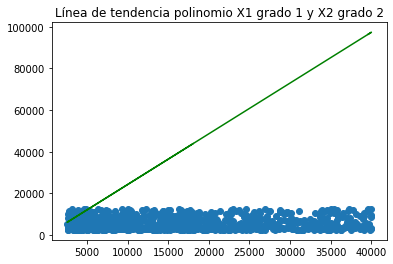

In [175]:
plt.scatter(df.iloc[:800, 5], df.iloc[:800,2])
plt.plot(df.iloc[:800, 5], np.array(df.iloc[:800,[3, 1, 5]]) @ r_theta_cv3, color='green')
plt.title('Línea de tendencia polinomio X1 grado 1 y X2 grado 2')

## Grado 2 X1 y 2 X2

In [142]:
np.random.shuffle(X)
np.random.shuffle(y)

In [143]:
X3 = X.copy()
X3[:,0] = np.square(X3[:,0])
X3[:,1] = np.square(X3[:,1])
X_train4, X_cv4, X_test4, y_train4, y_cv4, y_test4 = repartirData(X3, y)

In [144]:
df["X31"] = X3[:,0]
df["X32"] = X3[:,1]

In [145]:
learnr = 0.000000001
thr = 0.1

Train

In [146]:
r_theta_tr4, costs_tr4, thetas_tr4 = gradient_descent(X_train4, y_train4, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [161]:
r_theta_tr4

array([[1.61188922],
       [0.64577612],
       [2.42989131]])

Text(0.5, 1.0, 'Gráfica de costos (train): X1^2 y X2^2')

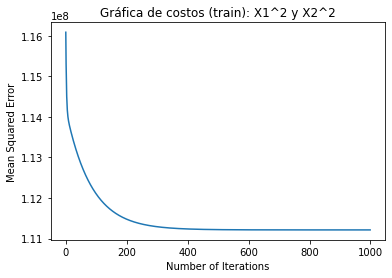

In [155]:
plt.plot(costs_tr4[:])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (train): X1^2 y X2^2')

Test

In [156]:
r_theta_te4, costs_te4, thetas_te4 = gradient_descent(X_test4, y_test4, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [162]:
r_theta_te4

array([[1.61188922],
       [0.64577612],
       [2.42989131]])

Text(0.5, 1.0, 'Gráfica de costos (test): X1^2 y X2^2')

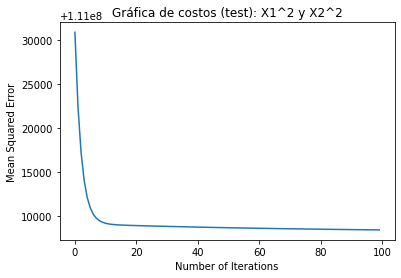

In [169]:
plt.plot(costs_te4[:100])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (test): X1^2 y X2^2')

CV

In [163]:
r_theta_cv4, costs_cv4, thetas_cv4 = gradient_descent(X_cv4, y_cv4, theta_0, linear_cost, linear_cost_gradient, learnr, thr)

In [164]:
r_theta_cv4

array([[1.61977371],
       [0.6300027 ],
       [2.43208223]])

Text(0.5, 1.0, 'Gráfica de costos (CV): X1^2 y X2^2')

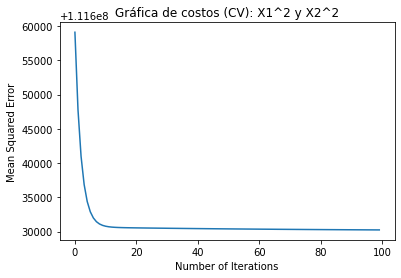

In [168]:
plt.plot(costs_cv4[:100])
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gráfica de costos (CV): X1^2 y X2^2')

Este modelo es bien generalizable y mantiene errores bajos. Se elegirá como el mejor

Tendencia

Text(0.5, 1.0, 'Línea de tendencia polinomio X1 grado 2 y X2 grado 2')

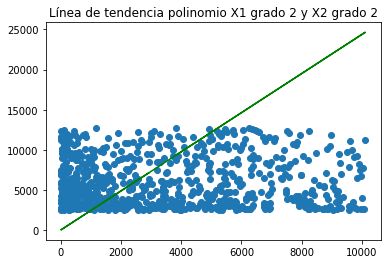

In [174]:
plt.scatter(df.iloc[:800, 6], df.iloc[:800,2])
plt.plot(df.iloc[:800, 6], np.array(df.iloc[:800,[3, 1, 6]]) @ r_theta_cv4, color='green')
plt.title('Línea de tendencia polinomio X1 grado 2 y X2 grado 2')

## Conclusiones

1. El grado del polinomio elegido será 2 para ambas variables
2. El lambda utilizado para regularizar fue 0 (no fue necesario) ya que no hubo caso de varianza 
3. En el modelo elegido se obtuvo convergencia a las 3 iteraciones con un learning rate de 0.000000001 y un threshold de 0.1
4. El cross validation que arrojó el modelo elegido muestra que no hay bias ni varianza; esto fue determinado comparando el error del modelo con respecto a la complejidad (grado del polinomio K) y los resultados del mismo (J)
